In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from array2gif import write_gif

from glob import glob
from tqdm import tqdm
from copy import deepcopy

In [9]:
wing_fps = glob('../slides/2_individual_wings/*.png')
np.random.seed(42)
np.random.shuffle(wing_fps)

wings = []
for wing_fp in wing_fps[:100]:
    #wing_fp = '../slides/2_individual_wings/Hive01_Sheet_01_slide5_right.jpg'
    big_cell_fp = wing_fp.replace('2_individual_wings','4_cleaned_sam_masks_big_cell').replace('.jpg','.png')
    medial_fp = wing_fp.replace('2_individual_wings','3_sam_masks_medial').replace('.jpg','.png')
    
    wing = cv2.cvtColor(cv2.imread(wing_fp), cv2.COLOR_BGR2RGB)
    wing = cv2.resize(wing, (804, 274))
    big_cell = np.zeros(wing.shape)
    medial = np.zeros(wing.shape)

    tmp = cv2.resize(cv2.imread(big_cell_fp, cv2.IMREAD_GRAYSCALE), (804, 274))
    big_cell[:,:,2:] = np.expand_dims(tmp,2)
    
    tmp = cv2.resize(cv2.imread(medial_fp, cv2.IMREAD_GRAYSCALE), (804, 274))
    medial[:,:,0:1] = np.expand_dims(tmp,2)
    
    wing[np.where(big_cell[:,:,2] > 100)] = (0.5*wing[np.where(big_cell[:,:,2] > 100)] + \
                                             0.5*big_cell[np.where(big_cell[:,:,2] > 100)]).astype('uint8')
    wing[np.where(medial[:,:,0] > 100)] = (0.5*wing[np.where(medial[:,:,0] > 100)] + \
                                             0.5*medial[np.where(medial[:,:,0] > 100)]).astype('uint8')
    
    
    wings += [32*(wing.astype('uint8')//32)]
    #plt.imshow(wing)

In [1]:
write_gif(wings, 'wings.gif', fps=10)

NameError: name 'write_gif' is not defined

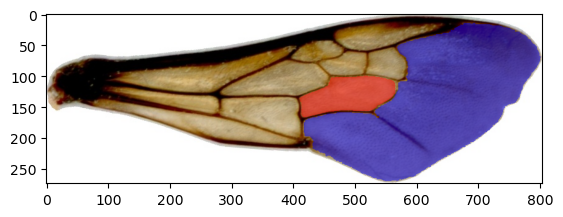

In [84]:
plt.imshow(wing)